In [17]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

Load our dataset and split it to train and test

In [10]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_train = x_train.astype('float32') / 255.0

y_train = to_categorical(y_train)

### Modelling

In [11]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

### Optimizer

In [12]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2352 - accuracy: 0.9279
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0772 - accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0516 - accuracy: 0.9842
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0369 - accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0282 - accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0162 - accuracy: 0.9951
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0122 - accuracy: 0.9966
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0091 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [23]:
image = random.choice(x_test)

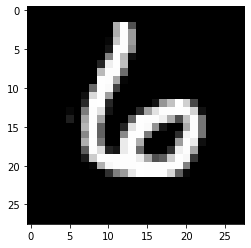

In [24]:
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()

In [25]:
image = (image.reshape((1,28,28,1))).astype('float32') /255.0

In [26]:
digit = np.argmax(model.predict(image)[0], axis=-1)

1/1 [==============================] - 0s 23ms/step


In [27]:
print("Prediction:", digit)

Prediction: 6
